In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
import sympy as sp



In [3]:
def create_data1():
    n=100
    x=3* (np.random.rand(n,2)-0.5)
    rad = np.square(x[:,0]) + np.square( x[:,1])
    a=(rad >0.7 + 0.1*np.random.rand(n,))
    b=(rad <2.2 + 0.1*np.random.rand(n,))
    y=np.logical_and(a,b)
    y=2*y - 1
    return x,y
    
def create_data2():
    n=40
    omega = np.random.randn(1)
    noise = 0.8 * np.random.randn(n,)
    x = np.random.randn(n,2)
    a=omega *x[:,0]
    b=x[:,1]
    y = 2 *(a+b+noise >0) -1 ;
    return x,y

def create_data3():
    m = 20;
    n = 40;
    r = 2;
    A = np.random.rand(m, r) * np.random.rand(r, n);
    ninc = 100;
    Q = np.random.randperm(m * n, ninc);
    
def print_data(x,y,w,t):
    for i,j in zip(x,y):
        color= 'b'
        if j==1: color='r'
        plt.plot(i[0],i[1],color+'o')
    if t ==1:
        n = np.arange(-3, 3, 0.1)
        m = -(w[0]/w[1]) *n
        plt.plot(n, m,'g')
    plt.show()

In [12]:
A = np.array([[3,0.5],[0.5,1]])
miu = np.array([[1],[2]])
print (A,miu.shape)

[[3.  0.5]
 [0.5 1. ]] (2, 1)


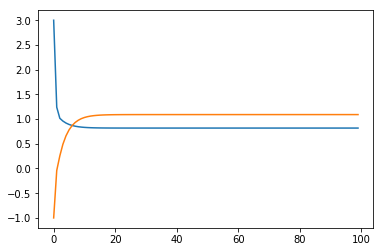

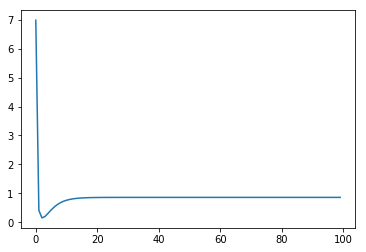

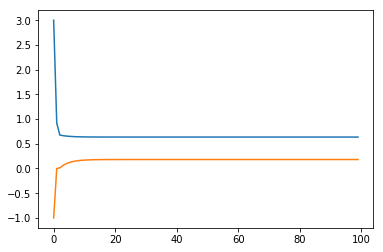

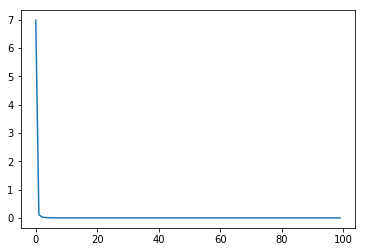

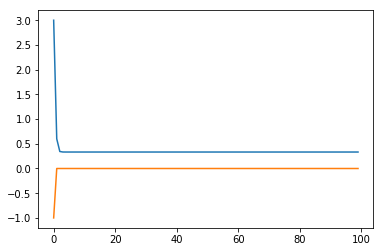

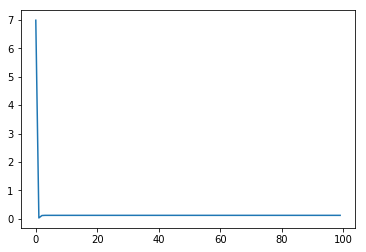

In [164]:
kMax = 100   # Number of iteration

# Generate A and miu

lamda = 4

if lamda == 2 : w_truth =np.array([0.8182,1.09]);
if lamda == 4 : w_truth =np.array([0.63636,0.182]);
if lamda == 6 : w_truth =np.array([0.333333,0]);
    
    
def PGD(lamda):
    A = np.array([[3,0.5],[0.5,1]])
    miu = np.array([[1],[2]])
    # This lamda is too large and making the x vector zero every time    
    wk = np.array([[3],[-1]]).reshape(2,1)     # Initialize 
    l_r = 0.16
    q=l_r*lamda
    w_his = []
    for k in range(kMax):
        grad = 2*A.dot(wk - miu)
        #l_r = 1/np.linalg.norm(A.T.dot(A))  
        w_kplus1 = wk - l_r*grad       # Gradient Descent (GD) Step
        st = []
        for i in range(2):
            miui = wk[i] - l_r*grad[i]
            if miui >q: st.append(miui-q);
            elif abs(miui) <q: st.append(np.array([0]));
            elif miui < -q: st.append(miui+q);
        w_kplus1 = np.array(st)
        w_his.append(wk)
        wk = w_kplus1
    return w_his
for lamda in range(2,7,2):
    w_his = PGD(lamda)
    plt.plot(np.array(w_his).reshape(100,2))
    plt.show()
    dif=[]
    for i,w in enumerate(w_his):
        dis=w.reshape(2,)-w_truth
        dis = float(dis[0]*dis[0] + dis[1]*dis[1])
        dif.append(dis)
    plt.plot(dif)
    plt.show()